In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

In [2]:
image = cv2.imread('images/pizza_bluescreen.jpg')

print('This image is:', type(image), 
      ' with dimensions:', image.shape)

This image is: <class 'numpy.ndarray'>  with dimensions: (514, 816, 3)


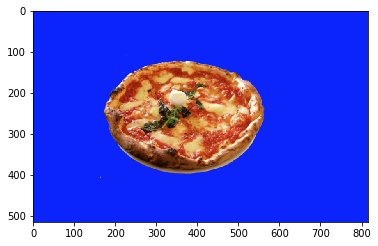

In [3]:
image_copy = np.copy(image)

image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

In [14]:
# 定义选择的范围
lower_blue = np.array([0,0,200]) 
upper_blue = np.array([80,80,255])

In [1]:
# cv2提供threshold函数
# cv2.threshold(gray, low, high, cv2.THRESH_BINARY)

255


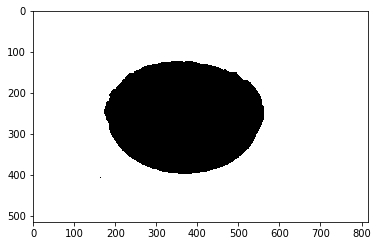

In [15]:
# 创造一个mask
mask = cv2.inRange(image_copy, lower_blue, upper_blue)
print(mask[1,1])
plt.imshow(mask, cmap='gray')

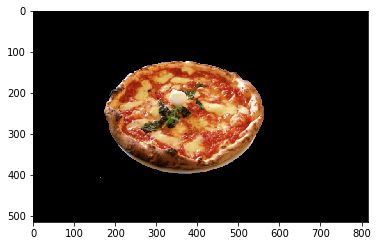

In [16]:
masked_image = np.copy(image_copy)

masked_image[mask != 0] = [0,0,0]

plt.imshow(masked_image)

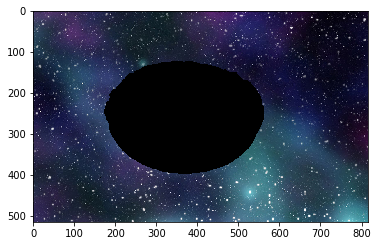

In [17]:
# 添加背景
background_image = cv2.imread('images/space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

crop_background = background_image[0:514, 0:816]

crop_background[mask==0] = [0,0,0]
plt.imshow(crop_background)

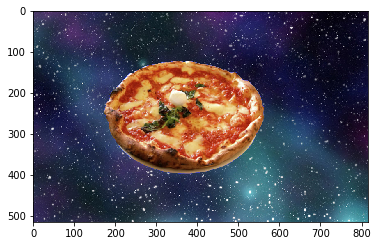

In [18]:
complete_image = masked_image + crop_background

plt.imshow(complete_image)